# Руководство по Docker для Data Scientists

Эта рабочая тетрадь является переводом оригинальной статьи [Docker Tutorial for Data Scientists](https://www.kdnuggets.com/2023/07/docker-tutorial-data-scientists.html), опубликованной на сайте kdnuggets.com

Хотите изучить Docker для data science? Изучите основы Docker и за несколько минут создайте контейнер для приложений, связанных с data science.

*By Bala Priya C, KDnuggets on July 14, 2023*

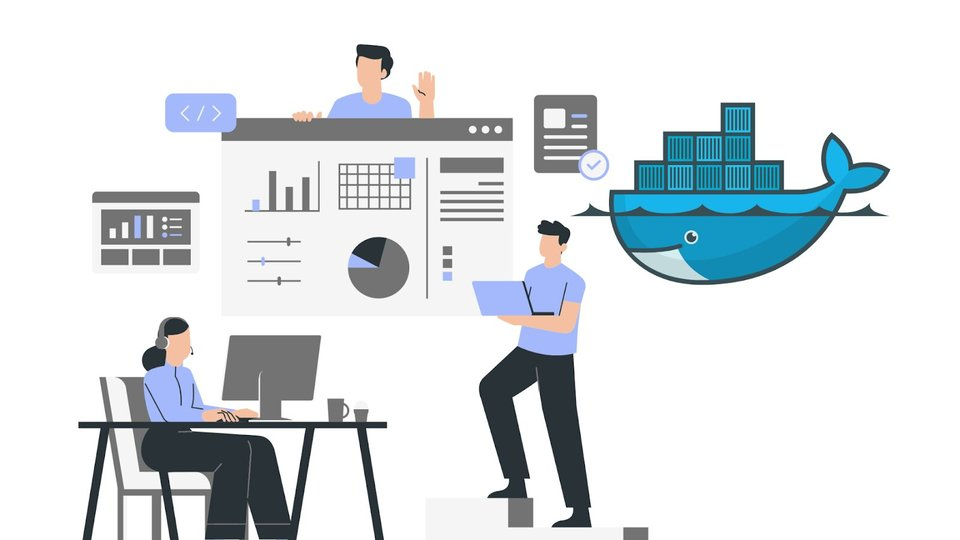


[Image](https://www.kdnuggets.com/2023/07/docker-tutorial-data-scientists.html) *by Bala Priya C*


Язык Python и набор библиотек Python для анализа данных и машинного обучения, таких как pandas и scikit-learn, позволяют с легкостью разрабатывать приложения для анализа данных. Однако управление зависимостями в Python представляет собой сложную задачу. При работе над проектом по data science вам придется потратить значительное время на установку различных библиотек и отслеживание версий используемых библиотек.

А что если другие разработчики захотят выполнить ваш код и внести свой вклад в проект? Другие разработчики, желающие повторить ваше приложение для анализа данных, должны сначала настроить среду проекта на своей машине, прежде чем приступать к выполнению кода. Даже такие незначительные различия, как разные версии библиотек, могут внести в код разрушающие изменения. На помощь приходит **Docker**. Docker упрощает процесс разработки и облегчает совместную работу.

Это руководство познакомит вас с основами Docker и научит контейнеризировать приложения для data science с помощью Docker.

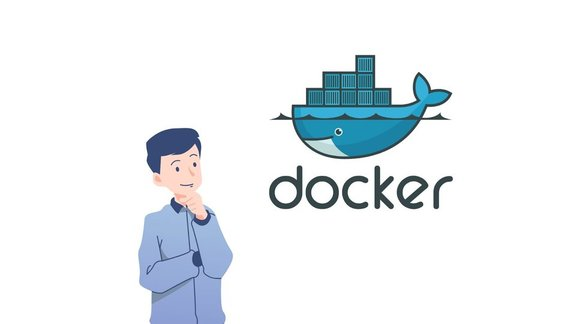

[Image](https://www.kdnuggets.com/2023/07/docker-tutorial-data-scientists.html) *by Bala Priya C*

[Docker](https://www.docker.com/) - это инструмент контейнеризации, позволяющий создавать и совместно использовать приложения в виде переносимых артефактов, называемых образами.

Помимо исходного кода, ваше приложение будет содержать набор зависимостей, необходимую конфигурацию, системные инструменты и т.д. Например, в проекте по data science вы установите все необходимые библиотеки в среду разработки (желательно в виртуальной среде). Также необходимо убедиться, что используется обновленная версия Python, поддерживаемая библиотеками.

Однако при попытке запустить приложение на другой машине вы все равно можете столкнуться с проблемами. Часто такие проблемы возникают из-за несовпадения конфигурации и версий библиотек в среде разработки на двух машинах.

С помощью Docker можно упаковать приложение вместе с зависимостями и конфигурацией. Таким образом, вы можете создать изолированную, воспроизводимую и согласованную среду для своих приложений на различных хост-машинах.

# Основы Docker: Образы, контейнеры и реестры

Давайте рассмотрим несколько понятий/терминов:

### Docker Image

Образ Docker - это переносимый артефакт вашего приложения.

### Docker Container

Когда вы запускаете образ, вы, по сути, получаете приложение, работающее в среде контейнера. Таким образом, запущенный экземпляр образа является контейнером.

### Docker Registry

Реестр Docker - это система хранения и распространения образов Docker. Контейнировав приложение в образ Docker, можно сделать его доступным для сообщества разработчиков, разместив в реестре образов. DockerHub является крупнейшим публичным реестром, и все образы по умолчанию извлекаются из DockerHub.

# Как Docker упрощает разработку?

Поскольку контейнеры обеспечивают изолированную среду для ваших приложений, другим разработчикам теперь достаточно установить Docker на своей машине. При этом они могут запускать контейнеры, извлекая образ Docker и запуская контейнеры с помощью одной команды, не заботясь о сложной установке на удаленной машине.

При разработке приложений также часто приходится собирать и тестировать несколько версий одного и того же приложения. Если использовать Docker, то можно иметь несколько версий одного и того же приложения, работающих в разных контейнерах, без конфликтов в одной среде.

Помимо упрощения разработки, Docker также упрощает развертывание и помогает эффективно сотрудничать командам разработчиков и командам системных инженеров. На стороне сервера команде системных инженеров не нужно тратить время на разрешение сложных конфликтов версий и зависимостей. Им достаточно иметь настроенную среду выполнения docker.

# Основные команды Docker

Давайте быстро рассмотрим некоторые основные команды Docker, большинство из которых мы будем использовать в этом руководстве. Для более подробного обзора читайте: [12 команд Docker, которые должен знать каждый специалист по исследованию данных](https://www.kdnuggets.com/2023/01/12-docker-commands-every-data-scientist-know.html).

Команда | Функция
:--- | :---
*docker ps* | Список всех запущенных контейнеров
*docker pull image-name* | По умолчанию image-name берется из DockerHub
*docker images* | Список всех доступных образов
*docker run image-name* | Запуск контейнера из образа
*docker start container-id* | Перезапуск остановленного контейнера
*docker stop container-id* | Остановка работающего контейнера
*docker build path* | Сборка образа по указанному пути с использованием инструкций в Dockerfile

> Примечание:
  Выполните все команды с префиксом sudo, если вы не создали группу **docker** для пользователя.

# Как контейнеризировать приложение Data Science с помощью Docker

Мы изучили основы Docker, и теперь пришло время применить полученные знания. В этом разделе мы выполним контейнеризацию простого приложения для анализа данных с помощью Docker.

### Модель прогнозирования цен на жилые помещения

Возьмем следующую линейную регрессионную модель, которая предсказывает целевое значение: медианную цену дома на основе входных признаков. Модель построена с использованием [набора данных по жилым помещениям в Калифорнии](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html):

In [1]:
# house_price_prediction.py
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка набора данных California Housing
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Разделите набор данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.56
R-squared Score: 0.58


Мы знаем, что `scikit-learn` является обязательной зависимостью. Если просмотреть код, то при загрузке набора данных мы устанавливаем `as_frame=True`. Поэтому нам также необходим `pandas`. А файл `requirements.txt` выглядит следующим образом:

```
pandas==2.0
scikit-learn==1.2.2
```

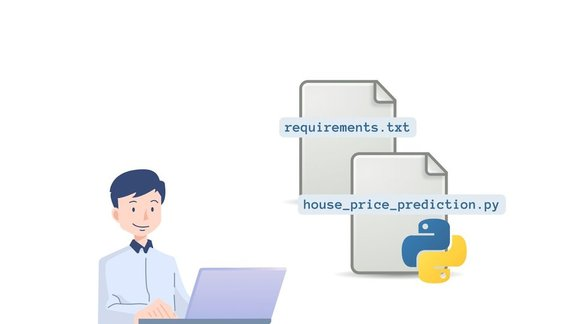

[Image](https://www.kdnuggets.com/2023/07/docker-tutorial-data-scientists.html) *by Bala Priya C*

### Создание Dockerfile

К настоящему времени у нас есть файл исходного кода `house_price_prediction.py` и файл `requirements.txt`. Теперь необходимо определить, *как* собрать образ из нашего приложения. Для создания сборки образа из файлов исходного кода приложения используется **Dockerfile**.

Что же такое Dockerfile? Это текстовый документ, содержащий пошаговые инструкции по сборке образа Docker.

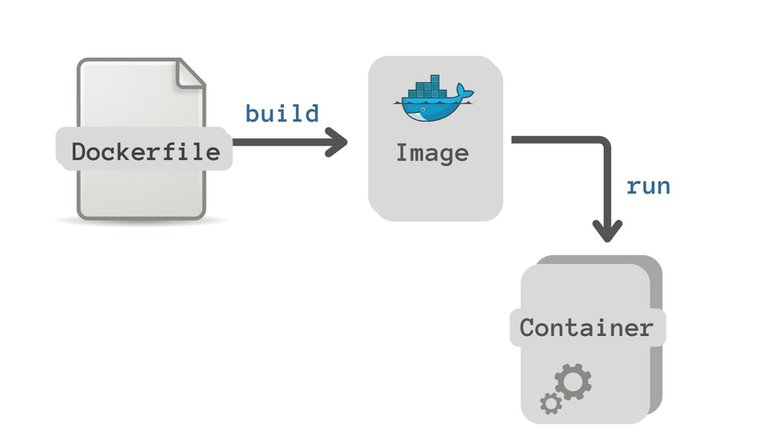

[Image](https://www.kdnuggets.com/2023/07/docker-tutorial-data-scientists.html) *by Bala Priya C*

Вот Dockerfile для нашего примера:

```
# Используйте официальный образ Python в качестве базового образа
FROM python:3.9-slim

# Установить рабочий каталог в контейнере
WORKDIR /app

# Скопировать файл requirements.txt в контейнер
COPY requirements.txt .

# Установить зависимости
RUN pip install --no-cache-dir -r requirements.txt

# Скопировать файл скрипта в контейнер
COPY house_price_prediction.py .

# Задайте команду для запуска вашего Python-скрипта
CMD ["python", "house_price_prediction.py"]
```

Давайте разберем содержимое Dockerfile:



*   Все Docker-файлы начинаются с инструкции `FROM`, в которой указывается базовый образ. Базовый образ - это тот образ, на котором основан ваш образ. Здесь мы используем доступный образ для Python 3.9. Инструкция FROM указывает Docker на сборку текущего образа из указанного базового образа.
*   Команда `WORKDIR` используется для установки рабочего каталога для всех последующих команд (в данном примере - app).
*   Затем мы копируем файл `requirements.txt` в файловую систему контейнера.
*   Команда `RUN` выполняет указанную команду в оболочке внутри контейнера. Здесь мы устанавливаем все необходимые зависимости с помощью `pip`.  
*   Затем мы копируем файл исходного кода - Python-скрипт `house_price_prediction.py` - в файловую систему контейнера.
*   Наконец, `CMD` обозначает инструкцию, которая должна быть выполнена при запуске контейнера. Здесь нам необходимо запустить сценарий `house_price_prediction.py`. Dockerfile должен содержать только одну инструкцию CMD.

### Сборка образа

Теперь, когда мы определили Dockerfile, мы можем собрать docker-образ, выполнив команду `docker build`:

```
docker build -t ml-app .
```

Флаг **-t** позволяет задать имя и тег для изображения в формате **name:tag**. По умолчанию используется тег *latest*.

Процесс сборки занимает несколько минут:

```
Sending build context to Docker daemon  4.608kB
Step 1/6 : FROM python:3.9-slim
3.9-slim: Pulling from library/python
5b5fe70539cd: Pull complete
f4b0e4004dc0: Pull complete
ec1650096fae: Pull complete
2ee3c5a347ae: Pull complete
d854e82593a7: Pull complete
Digest: sha256:0074c6241f2ff175532c72fb0fb37264e8a1ac68f9790f9ee6da7e9fdfb67a0e
Status: Downloaded newer image for python:3.9-slim
 ---> 326a3a036ed2
Step 2/6 : WORKDIR /app
...
...
...
Step 6/6 : CMD ["python", "house_price_prediction.py"]
 ---> Running in 7fcef6a2ab2c
Removing intermediate container 7fcef6a2ab2c
 ---> 2607aa43c61a
Successfully built 2607aa43c61a
Successfully tagged ml-app:latest
```

После сборки образа Docker выполните команду `docker images`. В списке должен появиться и образ `ml-app`.

```
docker images
```

Запустить Docker-образ ml-app можно с помощью команды `docker run`:

```
docker run ml-app
```

Поздравляем! Вы только что выполнили контейнеризацию своего первого приложения для data science. Создав учетную запись DockerHub, вы можете разместить образ в ней (или в частном хранилище организации).

# Заключение

Надеюсь, что это вводное руководство по Docker оказалось для вас полезным. Код, использованный в этом руководстве, можно найти в этом [репозитории GitHub](https://github.com/balapriyac/docker-data-science). В качестве следующего шага настройте Docker на своей машине и попробуйте выполнить этот пример. Или выполните контейнеризацию приложения по своему выбору.

Самый простой способ установить Docker на машину - использовать Docker Desktop: вы получаете как клиент Docker CLI, так и графический интерфейс для удобного управления контейнерами. Так что устанавливайте Docker и начинайте кодить прямо сейчас!

[Bala Priya C](https://www.linkedin.com/in/bala-priya/) - разработчик и технический писатель из Индии. Ей нравится работать на стыке математики, программирования, науки о данных и создания контента. В сферу ее интересов и опыта входят DevOps, наука о данных и обработка естественного языка. Она любит читать, писать, кодить и пить кофе! В настоящее время она работает над тем, чтобы учиться и делиться своими знаниями с сообществом разработчиков, создавая учебные пособия, руководства по эксплуатации, статьи и многое другое.